In [1]:

from bmapqml.utils import analyze_random_walk
import numpy as np

from bmapqml.chemxpl.minimized_functions import QM9_properties,multi_obj,Rdkit_properties
path = "/home/jan/projects/MOLOPT/do_sim/bias/both/9/"


WEIGHTS = np.array([ (1/1.9), (1/6.8)])

min_func = multi_obj(
    [QM9_properties("/store/common/jan/qm9/KRR_12000_atomization",verbose=False),QM9_properties("/store/common/jan/qm9/KRR_12000_gap",verbose=False)
], WEIGHTS, verbose=True)


ana = analyze_random_walk("{}".format(path)+"QM9_histogram.pkl","{}".format(path)+"QM9_best_candidates.pkl", model=min_func)

[17:11:17] Enabling RDKit 2019.09.3 jupyter extensions
RDKit WARNING: [17:11:17] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
min_func.__call__(ana.tps[0])

SMILE: CCCCCCCCC v1 -2.0069727491214557 v2 9.813838170225011


0.3869100487152961

In [3]:
values = ana.evaluate_histogram()

In [4]:
values.shape

(8178, 3)

In [5]:
values[0]

array([-2.00697275,  9.81383817,  0.38691005])

In [6]:
values[:,0]

array([-2.00697275, -1.97830904, -2.00472138, ..., -1.57426999,
       -1.55486193, -1.54094856])

In [15]:
time= np.arange(0,len(values[:,0]))

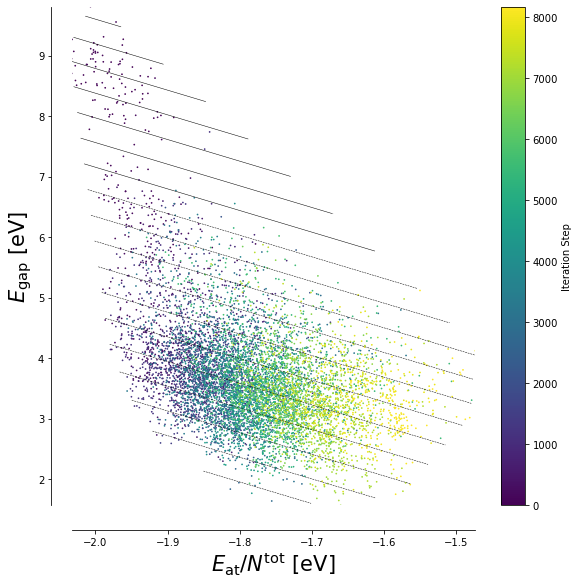

In [17]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
fig,ax1= plt.subplots(figsize=(8,8))


p1_acc  = values[:,0]
p2_acc  = values[:,1]
summe = values[:,2]
#summe  = accepted[" dGANDen"].values


#All_dG_new = All_dG_new*0.0175
xi = np.linspace(min(p1_acc), max(p1_acc), 1000)
yi = np.linspace(min(p2_acc), max(p2_acc), 1000)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(p1_acc, p2_acc)
interpolator = tri.LinearTriInterpolator(triang,summe)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

ax1.contour(xi, yi, zi, levels=18, linewidths=0.5, colors='k')
#ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")
sc = ax1.scatter(p1_acc, p2_acc,s =0.5, c=time)
plt.xlabel("$E_{\\rm {at}}/ N^{\\rm tot}$"  + " [eV]", fontsize=21)
plt.ylabel("$E_{\\rm {gap}}$" + " [eV]", fontsize=21)

clb = plt.colorbar(sc)
#clb.set_label("Step"+" [eV]") 
clb.set_label("Iteration Step") 

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('axes', -0.05))
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.spines['left'].set_position(('axes', -0.05))

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig("sum_const.pdf")